In [16]:
import sys

import argparse
import logging
from os.path import join
logger = logging.getLogger(__name__)
import numpy as np
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.append("../scripts")

from gmm.gmm import GMM
from cost import Cost
from config import Vxf0, options, opt_exec
from utils.utils import guess_init_lyap
from stabilizer import dsStabilizer
from visualization.visualizer import Visualizer


In [2]:
def load_saved_mat_file(x, **kwargs):
    matFile = sio.loadmat(x)

    data = matFile['Data']
    demoIdx = matFile['demoIndices']

    if ('Priors_EM' or 'Mu_EM' or 'Sigma_EM') in kwargs:
        Priors_EM, Mu_EM, Sigma_EM = matFile['Priors_EM'], matFile['Mu_EM'], matFile['Sigma_EM']
        return data, demoIdx, Priors_EM, Mu_EM, Sigma_EM
    else:
        return data, demoIdx


modelNames = ['w.mat', 'Sshape.mat']  # Two example models provided by Khansari
modelNumber = 0  # could be zero or one depending on the experiment the user is running

data, demoIdx = load_saved_mat_file(join('../example_models/', modelNames[modelNumber]))

Vxf0['d'] = int(data.shape[0]/2)
Vxf0.update(Vxf0)

Vxf0 = guess_init_lyap(data, Vxf0, options['int_lyap_random'])
cost = Cost(nDemo = 1, success=True, Nfeval = 0, verbose=False)

In [3]:
while cost.success:
    print('Optimizing the lyapunov function')
    Vxf, J = cost.learnEnergy(Vxf0, data, options)
    old_l = Vxf0['L']
    Vxf0['L'] += 1
    print('Constraints violated. increasing the size of L from {} --> {}'.format(old_l, Vxf0['L']))
    if cost.success:
        print('optimization succeeded without violating constraints')
        break

Optimizing the lyapunov function


/home/lex/miniconda3/envs/37/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:186: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


Constraints violated. increasing the size of L from 2 --> 3
optimization succeeded without violating constraints


In [13]:
num_points = 100 # number of linear spacing between points
offset = 30 # offset from trajectories
X = [np.min(data[0,:]) - offset, np.max(data[0,:]) + offset]
Y = [np.min(data[1,:]) - offset, np.max(data[1,:]) + offset]
Data_Limits = [X, Y]

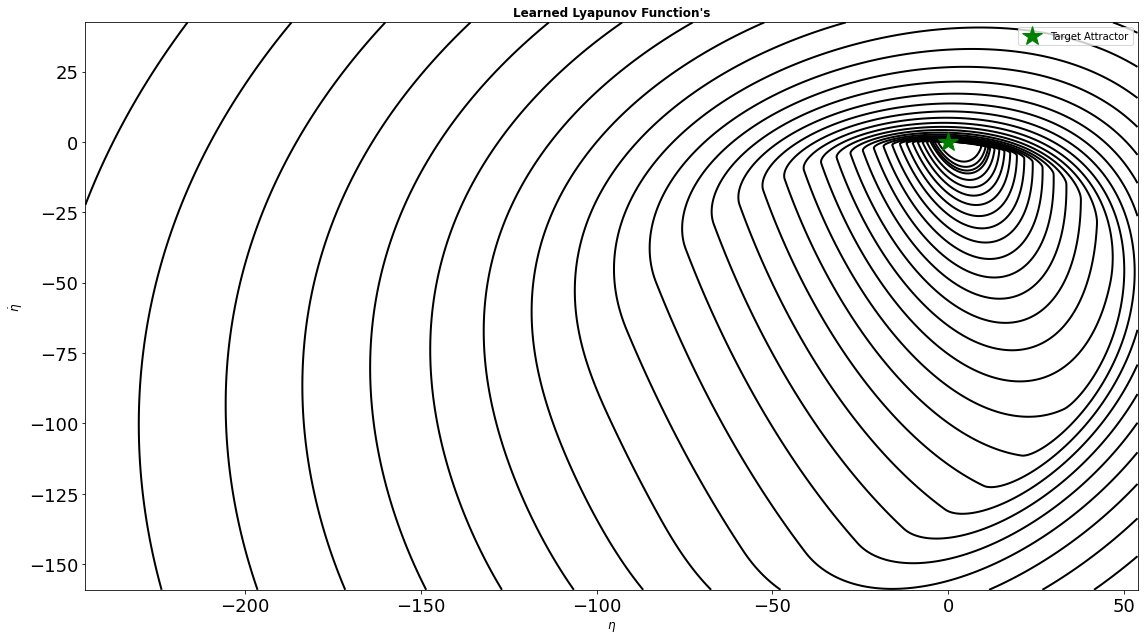

In [111]:

fig = fig = plt.figure(figsize=(16, 9))  
plt.clf()
viz = Visualizer(fig, savedict={'save': None})     
level_args = dict(disp=True, \
                  num_points=data.shape[-1], \
                  data=data, \
                  levels = np.array([]))
ax = viz.level_sets(Vxf, Data_Limits, cost, **level_args)

In [117]:
"Now stabilize the learned dynamics"
opt_sim = {'dt': 0.01,  'i_max': 4000, 'tol': 1}
d = data.shape[0]//2  # dimension of data
X0 = data[:d, demoIdx[0, :-1] - 1]

In [127]:
x = [2]
for i in range(5):
    x.append(i)
x    

[2, 0, 1, 2, 3, 4]

In [138]:
X0 = np.ones((2, 3))
x = np.zeros((4000,)+(X0.shape))
x[0] = X0

(2, 3) (4000, 2, 3)


In [131]:
x[0]

array([[1., 1., 1.],
       [1., 1., 1.]])

In [124]:
kwargs = {'Priors_EM': None}
data, demoIdx, Priors_EM, Mu_EM, Sigma_EM = load_saved_mat_file(join('../example_models/', modelNames[modelNumber]), **kwargs)


In [125]:
Priors_EM

array([[0.20218997, 0.20562152, 0.18374347, 0.18494871, 0.22349632]])